# Back Tracking

: 주어진 문제에 대해 **constraints을 반드시 만족**해야만 해가 될 수 있을 때, 

특정 candidate solution가 constraints을 만족할 수 없다고 판단되는 즉시
**backtrack하여 다른 candidate solution을 고려**하는 방식으로 해를 찾는 절차

- Brute Force Method를 개선하기 위한 방법
- Optimization Problem과 Decision Problem을 해결하는데 주로 사용

  🧐 Decision Problem이란❓ : 문제의 constraints을 만족하는 solution의 여부를 답하는 문제

<br>

# n - Queens

## 👉 4 - Queens

: 4개의 여왕말을 서로 상대방을 **위협( 같은 행/열/대각선 상 )**하지 않도록 4 x 4 체스판에 위치시키는 문제

### 상태 공간 트리( State Space Tree )

- 물리적 구현 아님
- 전위순회방식( Preorder Traversal, NLR )으로 **깊이우선탐색( Depth Frist Search )**을 수행
- 해 후보 : Root Node부터 Leaf Node까지의 경로 
  - 해가 될 가능성이 전혀 없는 노드의 후손 노드들도 모두 방문하는 경우 : 4^4개의 경로로 비효율적임

### 유망한 노드( Promising Node )
: 해가 될 가능성이 있는 노드
- **Pruning** : 유망하지 않다고 판정이 되면 N의 후손 노드들에 대한 방문을 중단하고 N의 부모 노드로 **Backtrack**하여 탐색 
- 유망성 검사 
  - col[i] = i번째 행에서 여왕말이 놓여있는 열
  - 서로 다른 행에 여왕말이 위치
  - 여왕말이 같은 열에 위치하는지 판단 : col[i] = col[k]
  - 여왕말이 같은 대각선상에 위치하는지 판단 : abs( col[i] - col[k] ) = abs(  i - k )

### State Space Tree를 이용한 문제 해결 시 Backtrack 절차
1. 상태공간 트리에 대해 깊이 우선 탐색 수행
2. 각 노드 N이 유망한지 점검
3. 만일 N이 유망하지 않으면 가지치기를 수행하고 N의 부모 노드로 되돌아가서 탐색 반복

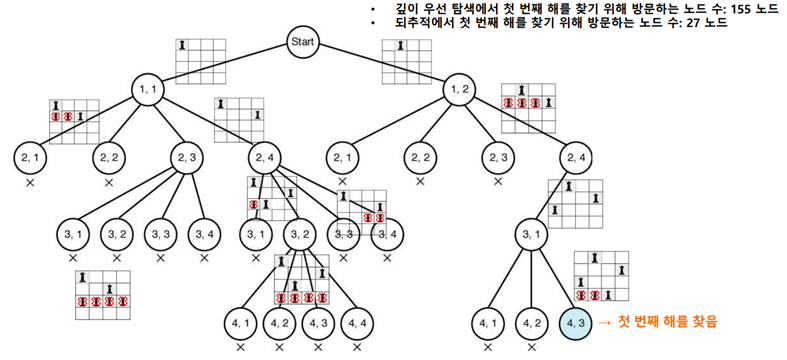

**✔️ n-Queens 문제 해결을 위한 BackTracking 알고리즘 수행 시간 분석**

- **수행시간 분석 어려움** : 정확한 수행 시간을 분석하기 위해서는 실제로 알고리즘을 실행하여 구축된 State Space Tree의 노드의 개수를 세어보는 수 밖에 없음
- 수행시간분석은 알고리즘을 실제로 수행하지 않고 이루어져야 하기 때문에 진정한 분석 방법이 될 수 없음


    1️⃣ State Space Tree의 모든 노드를 세어서 수행시간의 상한을 분석
    - Level 0 노드 : 1 개
    - Level 1 노드 : n 개
    - Level 2 노드 : n^2 개
      ...
    - Level n 노드 : n^n 개
    - 1 + n + n^2 + ... + n^n = ( n^(n+1) - 1 ) / ( n - 1 )
    - BackTracking을 통해 방문 노드 수가 얼마나 줄였는지 알 수 없기 때문에 의미없음

    2️⃣ Promising Node만 세어서 수행시간의 상한을 분석
    - 두 개의 여왕말이 동일한 열에 위치할 수 없다는 사실을 이용
    - Level 0 유망한 노드 : 1 개
    - Level 1 유망한 노드 : n 개
    - Level 2 유망한 노드 : n * ( n - 1) 개
    - Level 3 유망한 노드 : n * ( n - 1) * ( n - 2 ) 개
      ...
    - Level n 유망한 노드 : n! 개
    - 대각선을 점검하는 경우를 고려하지 않았으므로 실제 유망한 노드수는 훨씬 더 적으므로 의미없음

In [ ]:
n = 4
col = [0] * (n+1)

def n_queens(col, i):
  n = len(col) - 1
  if is_promising(col, i) :
    if i == n:
      print(col)
    else :
      for j in range(1, n+1):
        col[i+1] = j
        n_queens(col, i+1)

def is_promising(col, i):
  j = 1
  while j < i :
    if ( col[i] == col[j] ) or ( abs(col[i] - col[j]) == (i - j) ):
      return False
    j += 1
  return True

n_queens(col, 0)

[0, 2, 4, 1, 3]
[0, 3, 1, 4, 2]
